In [1]:
# Importando as bibliotecas a serem utilizadas

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

import numpy as np

In [2]:
# Importando a base de dados que será utilizada

base = datasets.load_iris()
previsores = base.data
classe = base.target
classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
# Transformação da classe para o formato "dummy", pois será feita uma rede neural com 3 neurônios na camada de saída

classe_dummy = np_utils.to_categorical(classe)
classe_dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [4]:
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(previsores, classe_dummy, test_size = 0.3, random_state = 0)

In [5]:
# Criação da estrutura da rede neural com a classe Sequential (Com essa classe as camadas são adicionadas de forma sequencial)
modelo = Sequential()

# Primeira camada oculta, 5 neuronios, 4 neuronios de entrada (Funçã dense faz com que todos os neurônios conectem com a camada seguinte)
modelo.add(Dense(units=5, input_dim=4))

# Segunda camada oculta
modelo.add(Dense(units = 4))

# Terceira camada oculta
# Função softmax porque temos um problema de classificação com mais de duas classes
# (é gerada uma probabilidade em cada neurônio)
modelo.add(Dense(units = 3, activation = 'softmax'))

In [6]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Configuração dos parâmetros da rede neural (adam = algoritmo para atualizar os pesos e loss = cálculo do erro)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Treinamento
modelo.fit(X_treinamento, Y_treinamento, epochs = 1000, validation_data = (X_teste, Y_teste))

Epoch 1/1000
4/4 [==============================] - 1s 103ms/step - loss: 5.6753 - accuracy: 0.3238 - val_loss: 4.2740 - val_accuracy: 0.3556
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 5.3914 - accuracy: 0.3238 - val_loss: 4.0578 - val_accuracy: 0.3556
Epoch 3/1000
4/4 [==============================] - 0s 15ms/step - loss: 5.1169 - accuracy: 0.3238 - val_loss: 3.8549 - val_accuracy: 0.3556
Epoch 4/1000
4/4 [==============================] - 0s 16ms/step - loss: 4.8524 - accuracy: 0.3238 - val_loss: 3.6593 - val_accuracy: 0.3556
Epoch 5/1000
4/4 [==============================] - 0s 17ms/step - loss: 4.6088 - accuracy: 0.3238 - val_loss: 3.4715 - val_accuracy: 0.3556
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 4.3637 - accuracy: 0.3238 - val_loss: 3.2983 - val_accuracy: 0.3556
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 4.1215 - accuracy: 0.3238 - val_loss: 3.1295 - val_accuracy: 0.3556
Epoch 8/1000

In [8]:
previsoes = modelo.predict(X_teste)
previsoes = (previsoes > 0.5)
previsoes

2/2 [==============================] - 0s 4ms/step


array([[False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [Fa

In [9]:
Y_teste_matrix = [np.argmax(t) for t in Y_teste]
Y_previsao_matrix = [np.argmax(t) for t in previsoes]

In [10]:
# Gerando a matriz de confusão
confusao = confusion_matrix(Y_teste_matrix, Y_previsao_matrix)
confusao

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

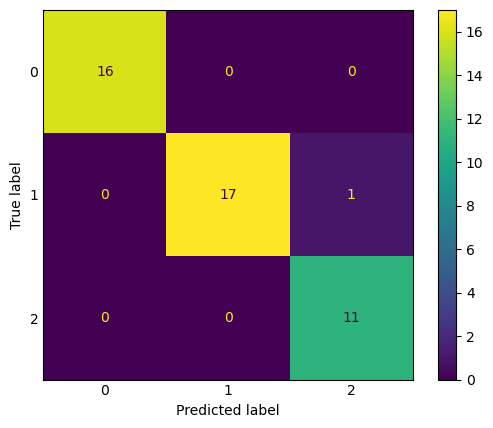

In [21]:
disp = ConfusionMatrixDisplay(confusao)
disp.plot()
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

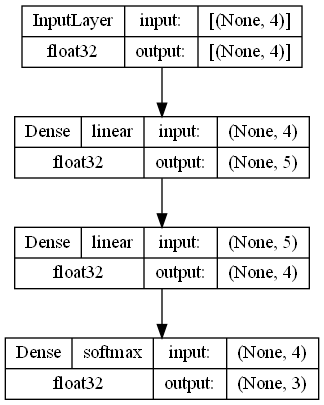

In [25]:
plot_model(modelo, show_shapes=True, show_dtype=True, show_layer_names=False, expand_nested=True, show_layer_activations=True)